# Zhenfeng Liang

## MTH9875 Homework 6

Assigned: October 8, 2015.
Due: October 22, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### Download some R-code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/10/9875-5.zip", destfile="9875-5.zip")
unzip(zipfile="9875-5.zip")
source("BlackScholes.R")

### 0. (0 points) 

Read Chapter 6 of The Volatility Surface. 

## The Kou double-exponential jump diffusion model


In the Kou model, the underlying follows a jump-diffusion process of the form

$$
x_t=\alpha\,t+\sigma\,W_t+\sum_{i=1}^{N_t}\,y_i
$$

where $\{N_t\}$ is the Poisson process counting the jumps of $x$ and $y_i$ are jump sizes.  The distribution of jump sizes is an asymmetric exponential with density

<a name="eq:KouDensity"></a>(1)
$$
\nu(x)=p\,\lambda_+\,e^{-\lambda_+\,x}\,{\bf 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\bf 1}_{x \leq 0}.
$$

### 1. (2 points)

Conditional on an up-jump, what is the expected size of the jump?


$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$



### Solution 1

We need to solve,

\begin{eqnarray}
\E[x\,|\,x \gt 0] &=& \frac{\int_{0}^{\infty}\,x\,p\,\lambda_+\,e^{-\lambda_+\,x}\,dx}{\int_{0}^{\infty}\,p\,\lambda_+\,e^{-\lambda_+\,x}\,dx} \\
&=& -\int_{0}^{\infty}\,x\,de^{-\lambda_+\,x} \\
&=& \int_{0}^{+\infty}\,e^{-\lambda_+\,x}\,dx \\
&=& \frac{1}{\lambda_+}
\end{eqnarray}

### 2. (8 points) 

Using the Lévy Khintchine formula, derive the characteristic function 
$
\phi_T(u)=\exp\{\psi(u)\,T\}
$
with

<a name="eq:KouPsi"></a>(2)
$$
\psi(u)=-\frac{\sigma^2}{2}\,u^2+i\,\omega\,u+i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
$$

where $\lambda$ is the mean jump arrival rate and

$$
\omega=-\frac{\sigma^2}{2}-\lambda\,\left\{\frac{p}{\lambda_+-1}-\frac{1-p}{\lambda_-+1}\right\}.
$$

$\psi(u)$ is known as the *characteristic exponent* of the Lévy process.

### Solution 2

Recall Lévy Khintchine formula,

$$
\phi_T(u)=\exp\left\{i \,u\, \omega\, T -\frac{1}{2}u^2\, \sigma^2 T +T
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi\right\}
$$

Density function in this case is,

$$
\nu(x)=p\,\lambda_+\,e^{-\lambda_+\,x}\,{\bf 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\bf 1}_{x \leq 0}.
$$

Recall the fact, $\int \mu(\xi)\,d\xi = \lambda$

In this case, we have
\begin{eqnarray}
\int \nu(x)\,dx &=& \int p\,\lambda_+\,e^{-\lambda_+\,x}\,{\bf 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\bf 1}_{x \leq 0}. dx \\
&=& \int_0^{+\infty} p\lambda_+ e^{-\lambda_+ x} dx + \int_{-\infty}^{0} (1 - p)\lambda_-e^{\lambda_- x} dx \\
&=& p + (1 - p) \\
&=& 1 = \lambda
\end{eqnarray}

Addition, we have,

\begin{eqnarray}
\int e^{i \,u \,\xi} \nu(\xi)\,d\xi &=& \int_0^{+\infty}\,p\,\lambda_+\,e^{(i\,u + \lambda_+)\xi}\,d\xi + \int_{-\infty}^{0}\,(1 - p)\,\lambda_-\,e^{(\lambda_- + i\,u)\xi}\,d\xi \\
&=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u}
\end{eqnarray}

Therefore, we have
\begin{eqnarray}
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi &=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u} - \lambda \\
&=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u} - 1 \\
&=& \frac{p\,\lambda_+}{\lambda_+ - i\,u} + \frac{(1-p)\,\lambda_-}{\lambda_- + i\,u} - p - (1 - p) \\
&=& \frac{p\,i\,u}{\lambda_+ - i\,u} - \frac{(1-p)\,i\,u}{\lambda_- + i\,u} \\
&=& i\,u\,\lambda\,(\frac{p}{\lambda_+ - i\,u} - \frac{1 - p}{\lambda_- + i\,u})
\end{eqnarray}

Then, from Lévy Khintchine formula, we have, 
\begin{eqnarray}
\phi_T(u) &=& \exp\left\{i \,u\, \omega\, T -\frac{1}{2}u^2\, \sigma^2 T +T
\int \left[e^{i \,u \,\xi}-1\right]\mu(\xi)\,d\xi\right\} \\
&=& \exp\left\{(i \,u\, \omega -\frac{1}{2}u^2\, \sigma^2 + \int \left[e^{i \,u\,\xi}-1\right]\mu(\xi)\,d\xi )\,T\right\} \\
&=& \exp\left\{(i \,u\, \omega -\frac{1}{2}u^2\, \sigma^2 +  i\,u\,\lambda\,(\frac{p}{\lambda_+ - i\,u} - \frac{1 - p}{\lambda_- + i\,u}))\,T\right\} \\
&=& \exp\{\psi(u)\,T\}
\end{eqnarray}

So, we have,
$$
\psi(u)=-\frac{\sigma^2}{2}\,u^2+i\,\omega\,u+i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
$$

Also, from the fact, $$\phi_T(-i)=\mathbb{E}\left[e^{x_T}\right]=1$$ 

Then $\psi(-i) = 0$, we have
$$
\psi(-i)= \frac{\sigma^2}{2} + \omega + \lambda\,\left\{\frac{p}{\lambda_+ - 1}-\frac{1-p}{\lambda_- + 1}\right\}
$$

which means,
$$
\omega=-\frac{\sigma^2}{2}-\lambda\,\left\{\frac{p}{\lambda_+-1}-\frac{1-p}{\lambda_-+1}\right\}.
$$

Q.E.D

### 3. (6 points) 

Use the characteristic exponent [(2)](#eq:KouPsi) and Lewis's formula (6) from the notes to plot the one-year implied volatility smile assuming the following parameters:

$$
\sigma=0.2; \,\lambda=1.0;\,p=0.25;\,\lambda_-=8;\,\lambda_+=25;
$$

The log-strike range should be from $k=-1.0$ to $k=1.0$.  

### Solution 3

In [2]:
source("Heston2.R")

In [3]:
# Characteristic function of Kou double exponential jump diffusion model
phiKou <- function(params)
{   
    sig <- params$sig
    lambda <- params$lambda
    p <- params$p
    lambdaM <- params$lambdaM
    lambdaP <- params$lambdaP
       
    res <- function(u, t)
    {
        omega <- -sig * sig / 2.0 - lambda * (p / (lambdaP - 1) - (1-p) / (lambdaM + 1))
        psi <- -sig * sig / 2.0 * u * u + (0+1i) * omega * u 
        psi <- psi + (0+1i) * u * lambda * ((p / (lambdaP - (0+1i) * u)) - (1-p) / (lambdaM + (0+1i) * u))
        
        res <- exp(psi * t)
        
        return(res)
    }
    
    return(res)
}

In [4]:
# Initialize the parameters
subKou <- list(sig = 0.2, lambda = 1.0, p = 0.25, lambdaM = 8.0, lambdaP = 25.0)

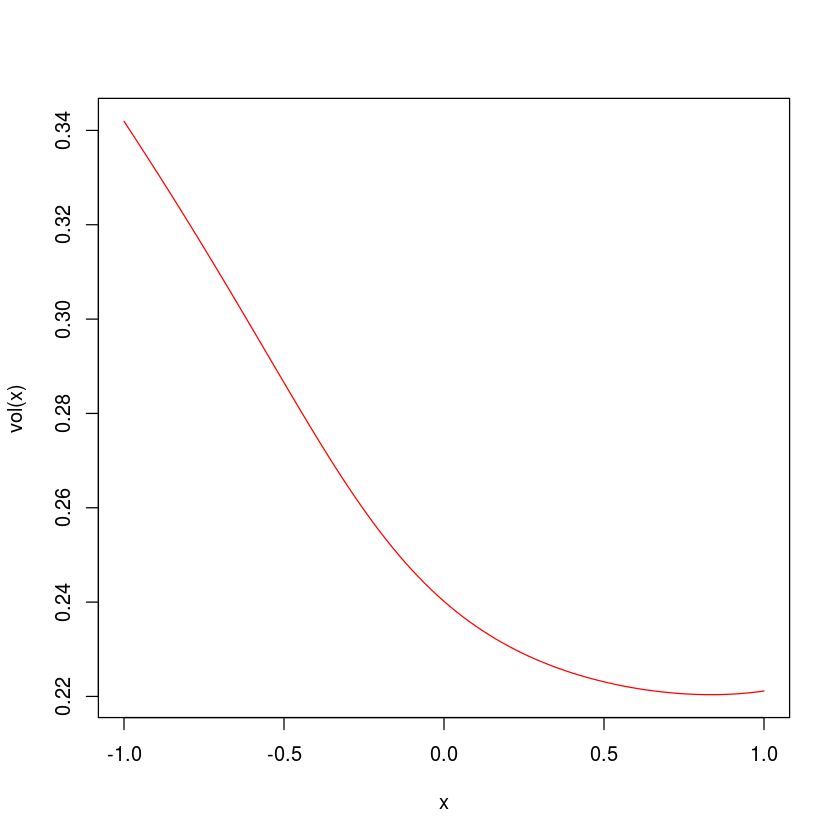

In [5]:
vol <- function(k){sapply(k,function(x){bsvol(phiKou(subKou),x,1)})}
curve(vol(x),from=-1.0,to=1.0,col="red")

## Jump-Diffusion Monte Carlo

### 4. (10 points) 

Write Monte Carlo code to price European options in the Kou model.  With the same parameters as in Problem 3, plot the one-year implied volatility smile from $k=-1.0$ to $k=1.0$.  Verify that you obtain the same implied volatilities.

### Solution 4:

We use $\mu_J$, the jump compensator as the dynamics drift $\alpha$.

We know, $$\alpha = -\lambda\E[J-1]$$

We need to solve,

\begin{eqnarray}
\E[J] &=& \int_{-\infty}^{+\infty}\,x\,\nu(x)\,dx \\
&=& \int_{0}^{+\infty}\,p\,x\,\lambda_+\,e^{-\lambda_+\,x}\,dx + \int_{-\infty}^{0}\,(1-p)\,x\,\lambda_-\,e^{\lambda_-\,x}\,dx \\
&=& \frac{p}{\lambda_+} - \frac{1-p}{\lambda_-} \quad{\text{(intergrate by part for each one)}}
\end{eqnarray}

Therefore, we will have,
$$
\alpha = -\lambda\E[J-1] = -\lambda\,(\frac{p}{\lambda_+} - \frac{1-p}{\lambda_-} - 1)
$$

In [8]:
calJumps <- function(n, p, lamp, lamm)
{
    # Function to generate random number from asymmetric exponential distribution
    #
    # Args:
    #      n: number of rv to generate
    #      p: probability of rv to be positive
    #      lamp: rate for positive rv, 
    #      lamm: rate for negative rv
    #
    # Return:
    #      vector of random number generated from asymmetric exponential distribution
    

    res <- 0
    
    #if(n < -100)
    #{
    #    prob <- runif(n, min=0, max=1)
    
    #    exp_pos <- rexp(n, rate=lamp)
    #    exp_neg <- -rexp(n, rate=lamm)
    
    #    res <- sum((prob < p) * exp_pos + (prob >= p) * exp_neg)        
    #}
    
    if(n >0)
    {
        prob <- runif(n, min=0, max=1)
        lampV <- rep(lamp, n)
        lammV <- rep(lamm, n)
    
        lamV <- (prob < p) * lamp + (prob >= p) * lamm
    
        tmp <- rexp(n, rate=lamV)
        
        res <- sum((prob < p) * tmp - (prob >= p) * tmp)
    }

    return(res)
}


MCCallKou <- function(kouParams, k, T, paths=100000, steps=1)
{
    # Function to calculate call option price using MC under Kou double exponential model
    # Note: assuming alpha = mu_j, S0 = 1, r = 0
    #
    # Args:
    #     params: Kou's model parameters list
    #     paths: number of monte carlo paths
    # 
    # Return:
    #     Call option price
    
    sig <- kouParams$sig
    lambda <- kouParams$lambda
    p <- kouParams$p
    lambdaM <- kouParams$lambdaM
    lambdaP <- kouParams$lambdaP
    
    # Let jump compensator be the drift
    #alpha <- -lambda * (p / lambdaP - (1 - p) / lambdaM - 1)
    #alpha <- 0
    #muJ <- -lambda * ( (1 - p) * lambdaM / (2 + lambdaM) - p * lambdaP / (2 - lambdaP) - 1)
    #alpha <- muJ - sig^2 / 2.0
    alpha <- 0
    
    K <- exp(k)
    
    dt <- T / steps

    
    evolveK <- function(x)
    {
        BMs <- rnorm(paths)
        Nts <- rpois(paths, lambda * dt)
    
        BMs <- BMs - mean(BMs);  BMs <- BMs/sd(BMs)
        
        jumps <- sapply(Nts, function(Nt){calJumps(Nt, p, lambdaP, lambdaM)})
        
        x <- x + alpha * dt + sig * sqrt(dt) * BMs + jumps 
    
        x <- x - log(mean(exp(x))) 
        
        return(x)
    }

    x <- numeric(paths)
    
    for (i in 1:steps)
    {
        x <- evolveK(x)        
    }
    
    ST <- exp(x)
    
    payoff <- (ST > K) * (ST - K)
    
    res <- mean(payoff)
    
    return(res)
}

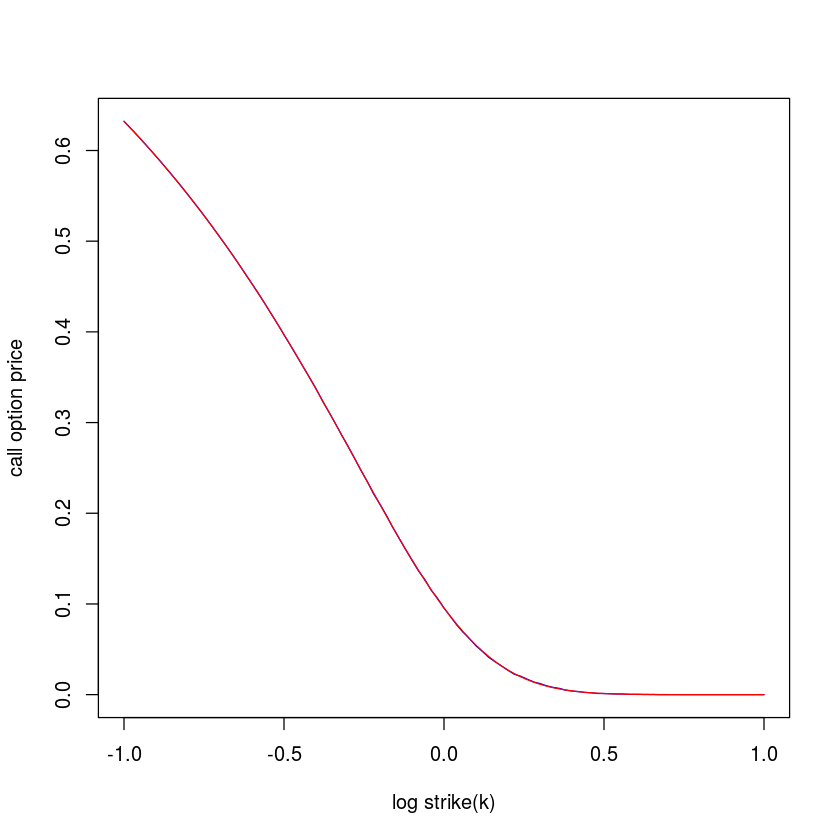

In [9]:
# Test Monte Carlo Price with 10000 paths

subKou <- list(sig = 0.2, lambda = 1.0, p = 0.25, lambdaM = 8.0, lambdaP = 25.0)

MCCalls <- function(k){sapply(k, function(x){MCCallKou(subKou, x, 1.0, 10000)})}
phiCalls <- function(k){sapply(k, function(x){callOption(phiKou(subKou), x, 1.0)})}

curve(MCCalls(x),from=-1.0,to=1.0,col="blue", xlab="log strike(k)", ylab="call option price")
curve(phiCalls(x), from=-1.0, to=1.0, col="red", add=TRUE)

### Comments

As we can see, for 10000 paths, the call option price curve calculated by monte carlo is almost exactly on the top of the call option price curve calculated by characteristic method

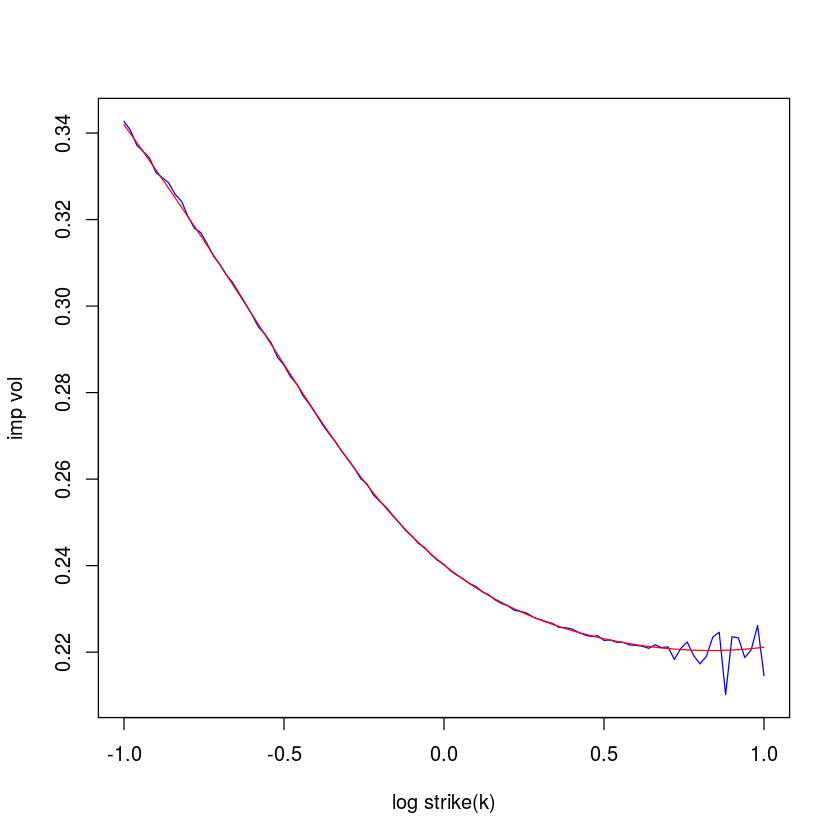

In [10]:
# Plot the imp vol from MC and characteristic method
# In order to replicate imp vol graph below, I take 1M paths and 16 steps. It will take hours to run.  

MCbsvol <- function(k){BSImpliedVolCall(1, exp(k), 1.0, 0, MCCallKou(subKou, k, 1.0, paths=1000000))}

MCvol <- function(k){sapply(k,function(x){MCbsvol(x)})}

curve(MCvol(x),from=-1.0,to=1.0,col="blue", xlab="log strike(k)", ylab='imp vol')
curve(vol(x),from=-1.0,to=1.0,col="red", add=TRUE)

## Term structure of ATM skew

### 5.(4 points) 

Using formula (8) from the lecture notes:

\begin{equation}
\left.\frac{\partial \sigma_{BS} }{\partial k }\right|_{k=0}=-
e^{\frac{\sigma_{BS}^2 T}{8}} \sqrt{\frac{2}{ \pi}}\frac{1}{
\sqrt{T}}\,\int_0^\infty\,du \, \frac{u\,
\mathrm{Im}\left[\phi_T(u-i/2)\right]}
{u^2+\frac{1}{4}},
\end{equation}
plot the ATM volatility skew

$$
\left.\frac{\partial \sigma_{BS} }{\partial k }\right|_{k=0}
$$

from 0 to 10 years.  Superimpose the curve $a/\sqrt{T}$, setting $a$ so as to match the one-year ATM skew. 

### Solution 5:

In [11]:
atmSkew <- function(phi, t){
    atmVol <- BSImpliedVolCall(S0=1, K=1, T=t, r=0, C=callOption(phi, 0, t));
    integrand <-  function(u){Im(u*phi(u - 1i/2, t)/(u^2 + 1/4))};
    res <- -integrate(integrand,lower=0,upper=Inf,rel.tol=0.0000000001,subdivisions=1000)$value/sqrt(t)*sqrt(2/pi)*exp(atmVol^2*t/8);
    return(res);
}

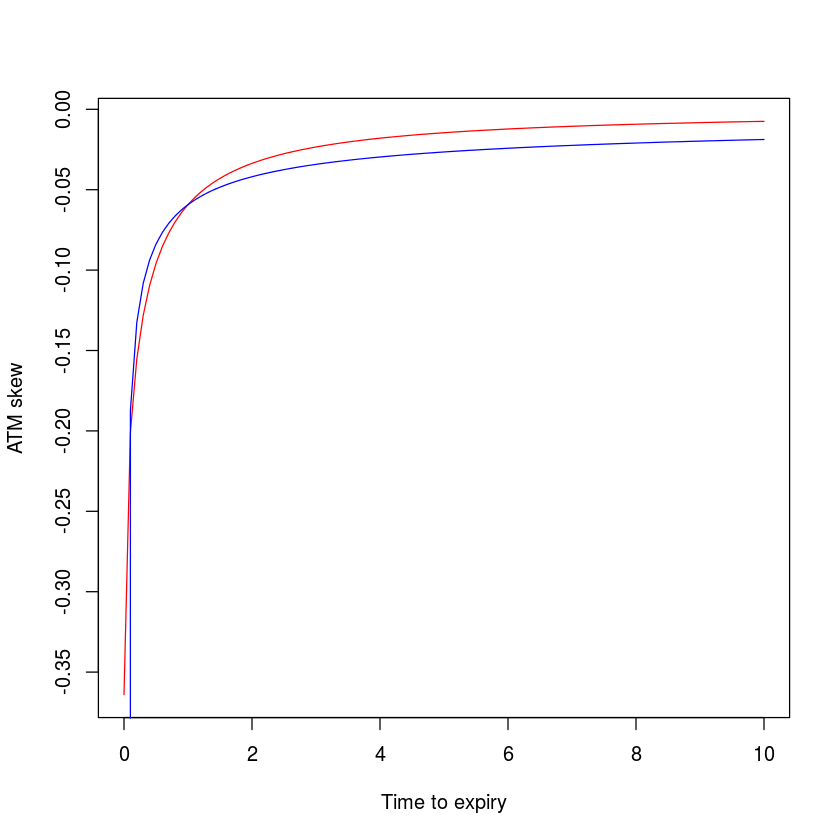

In [12]:
atmSkewV <- function(t){sapply(t, function(x){atmSkew(phiKou(subKou), x)})}

# Set alpha to match the one-year ATM skew
alpha <- atmSkew(phiKou(subKou), 1)

curve(atmSkewV(x),from=0.000001,to=10,col="red",xlab="Time to expiry", ylab="ATM skew")
curve(alpha / sqrt(x), from=0.000001,to=10,col="blue", add=TRUE)



## Qualitative assessment of the Kou model

### 6. (6 points)  

Make some clear qualitative comments directed at a non-specialist (*e.g.* your boss who is a trader) as to the suitability of the Kou model for pricing exotic derivatives.  Consider how realistic the process is and how well the model can fit the empirical volatility surface.

### Solution 6:

### Comments:

1: The dynamic process is reasonable. It is a diffusion process plus some jump process, where the number of jump is reasonable, possion process, and the distribution of the jump size is also reasonable. What the density function said is that there is some probablity, p, the jump size will be positive, and 1-p probality that it will be negative. And the jump size density is an exponential decay of the magnitude of the size, which means probablity to have a larger jump is smaller than the probability to have a smaller jump. And those are controled by exponential parameters, $\lambda_+$ and $\lambda_-$. With these controled parameters, people can use the vanilla option market data to calibrate these model parameters, then to price the exotic derivatives.

2: Look at the implied volatility smile, it is very smooth which we are expecting. But IMO, the saddle point is kind of shifted a little bit right, which means this model might overprice some low strike derivatives and then underprice some high strike derivatives.

3： If we look at the monte carlo method and characteristic method pricing graph, they are almost on the top of each other which is what we are expecting, but if we look at the vol smile generated by these two methods, we will see the they are kind of match for low strike and there is some noise for high strike. The noise is due to Monte Carlo, the value for high strike call option is relative low, which means the same monte carlo noise will have relative larger noise for high strike. This kind of noise can be reduced by increasing the number of paths or use some variance reduction techniques. So, using MC to price some OTM exotic derivatives might have some noise.

4: If we look at the ATM skew term structure, we will see that the ATM skew term structure generated by this model is a little bit harder to bend which is also what we are expecting. AFAIK, ATM skew term structure from all kinds of models are harder to bend than a normal square root model. 